# Models with Synthetic Data

Trains models on synthetic data .

In [2]:
import sys
sys.path.append('../..')


In [7]:
from model_compra_comigo.data_handler import DataSimulator
from model_compra_comigo.data_handler import DataHandler
import tensorflow as tf
from numpy import arange
import tensorflow_datasets as tfds
from pmdarima import auto_arima


In [8]:
data_simulator = DataSimulator()
data_handler = DataHandler()


## Generate a Dataset

{"levelname": "WARNING", "asctime": "2023-07-05 00:42:35,639", "filename": "legend.py", "funcName": "_parse_legend_args", "lineno": 1323, "message": "No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument."}


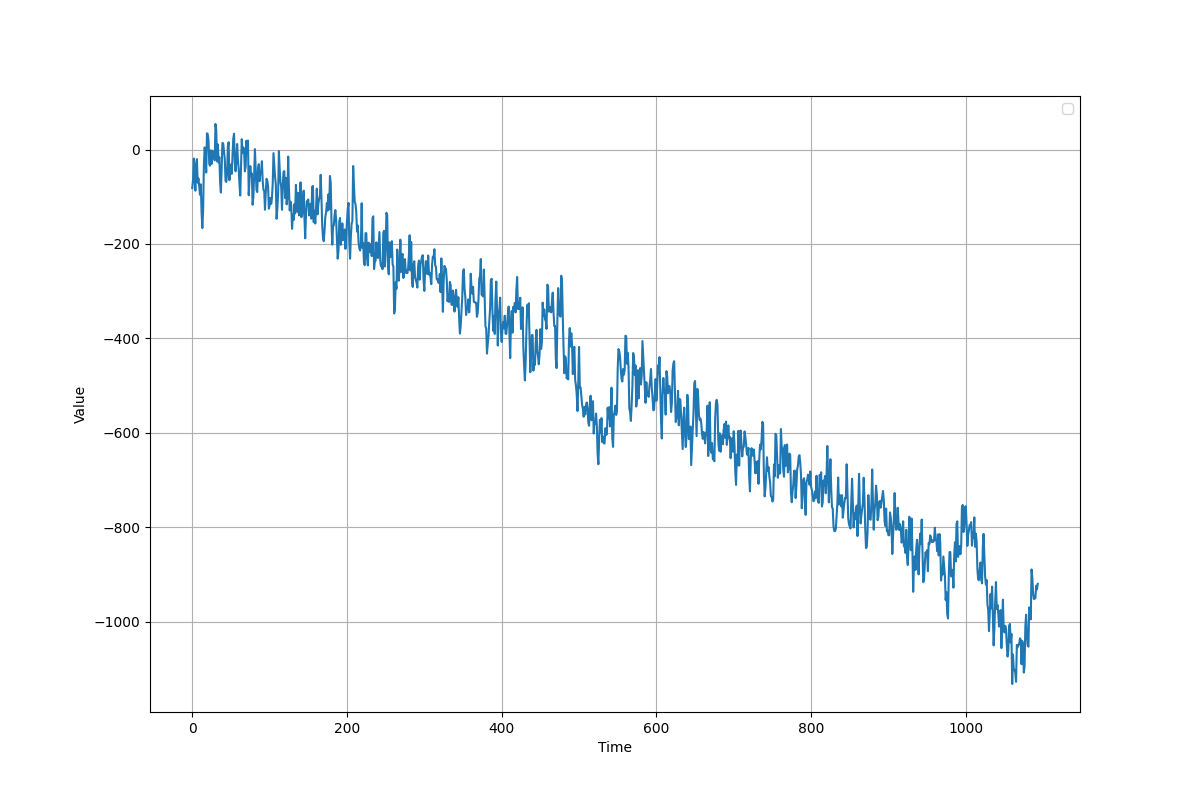

In [10]:
time_range = 365*3
split = 90
time_data = arange(time_range)

series, parameters = data_simulator.generate(
    time_range = time_range,
)

labels=[(f"trend_slope = {parameters['trend_slope']}\n"
         f"seasonality_period = {parameters['seasonality_period']}\n"
         f"seasonality_amplitude = {parameters['seasonality_amplitude']}\n"
         f"seasonality_phase = {parameters['seasonality_phase']}\n"
         f"seasonality_time_threshold = {parameters['seasonality_time_threshold']}\n"
         f"seasonality_ncos = {parameters['seasonality_ncos']}\n"
         f"seasonality_nexp = {parameters['seasonality_nexp']}\n"
         f"noise_scaling_factor = {parameters['noise_scaling_factor']}\n"
         f"autocorrelation_amplitude = {parameters['autocorrelation_amplitude']}\n"
         f"autocorrelation_phi = {parameters['autocorrelation_phi']}"
        )]

data_handler.plot_series(
    time=time_data,
    series=series,
    labels=labels
)


# Trains and tests some models
Experimentation

## Autoarima


In [ ]:
# https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd
arima = auto_arima(
    series[:-split],
    error_action="ignore",
    trace=False,
    suppress_warnings=True,
    maxiter=100,
    seasonal=True,
    start_p=0,
    d=1,
    start_q=0,
    max_p=6,
    max_d=6,
    start_P=0,
    D=1,
    start_Q=0,
    max_P=6,
    max_D=6,
    maX_Q=6,
    m=12,
    n_fits=10
)


In [ ]:
parameters = arima.get_params(deep=True)
parameters

In [ ]:
predictions = arima.predict(n_periods=split, return_conf_int=False)
predictions

In [ ]:
predictions.shape

In [ ]:
data_simulator.plot_series(time_data[-split:], (series[-split:], predictions))

## Lessons
Easy to kill the kernel (somewhat intensive. Performance is somewhat off?
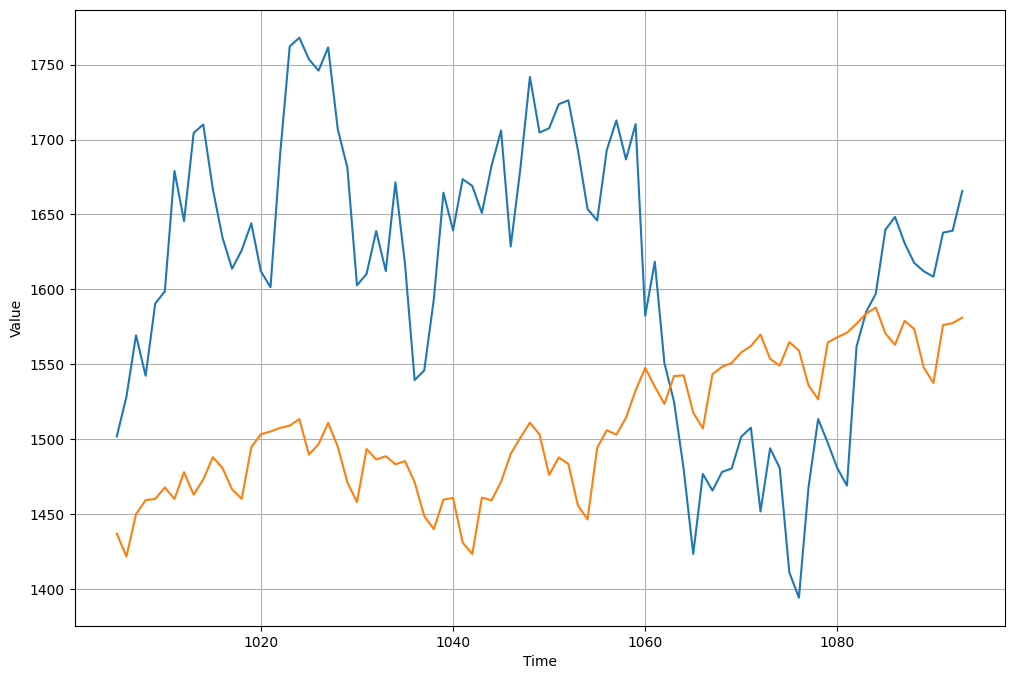